In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load sample data (replace with your actual data loading)
data = pd.read_csv("Dataset/Dos_dataset.csv", header=None)
# Assign column names
data.columns = ['Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1',
                'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']

# Convert Flag column to numerical labels using label encoding
label_encoder = LabelEncoder()
data['Flag'] = label_encoder.fit_transform(data['Flag'])

# Check if 'Timestamp' column is already in datetime format
# if not pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
#     # Convert Timestamp to datetime with milliseconds unit
#     data["Timestamp"] = pd.to_datetime(data["Timestamp"], unit="ms")

data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Convert CAN ID and DLC to integer
data["CAN_ID"] = data["CAN_ID"].apply(lambda x: int(x, 16) if isinstance(x, str) else x)
data["DLC"] = data["DLC"].astype(int)



In [2]:
# Convert DATA fields from hexadecimal strings to integers
def hex_to_int(x):
    if isinstance(x, str):
        try:
            return int(x, 16)
        except ValueError:
            return np.nan
    else:
        return x


# Convert DATA fields from hexadecimal strings to integers
for i in range(8):
    data[f"DATA{i}"] = data[f"DATA{i}"].apply(hex_to_int).astype(float)

# Debug prints
# print(data.dtypes)  # Print data types of all columns
# # print(data.head())  # Print first few rows of the dataset
# print(data['DATA2'].value_counts(dropna=False))
# Debug prints
# print(data['DATA2'].unique())  # Print unique values in DATA2 column
# data.head(10)

# Assuming 'Flag' column represents the target variable
X = data.drop('Flag', axis=1)  # Features
y = data['Flag']  # Target variable

In [3]:


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop 'Timestamp' column from input features
X_train = X_train.drop('Timestamp', axis=1)
X_test = X_test.drop('Timestamp', axis=1)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



# Initialize SVC with non-linear kernel
svc_classifier = SVC(kernel='rbf')  # rbf stands for Radial Basis Function (non-linear)

# Train the classifier
svc_classifier.fit(X_train_imputed, y_train)


SVC()

In [4]:
# Predict on the test set
y_pred = svc_classifier.predict(X_test_imputed)

In [5]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
# Calculate precision, recall, and F2 score
# precision = precision_score(y_test, y_pred, average='micro')
# recall = recall_score(y_test, y_pred, average='micro')
# f2_score = fbeta_score(y_test, y_pred, beta=2, average='micro')
# Convert class labels to strings
classes = [str(cls) for cls in label_encoder.classes_]

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.9998541885916287
Recall: 0.9998540554180221
F1 Score: 0.9998540823244035


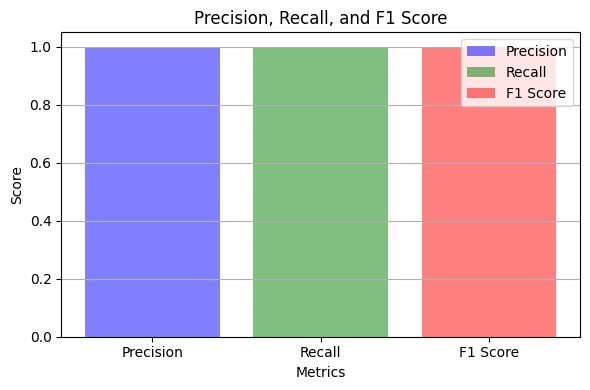

In [6]:

plt.figure(figsize=(6, 4))

# Precision
plt.bar(['Precision'], [precision], color='b', alpha=0.5, label='Precision')

# Recall
plt.bar(['Recall'], [recall], color='g', alpha=0.5, label='Recall')

# F1 Score
plt.bar(['F1 Score'], [f1_score], color='r', alpha=0.5, label='F1 Score')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3]:
from scipy.interpolate import interp1d

# Define the models and their corresponding metrics
models = ['SVC', 'SGD', 'CNN', 'MLP']
precision = [0.999854189, 1, 0.97, 0.8]
recall = [0.999854055, 1, 0.96, 0.823]
f1_score = [0.999854082, 1, 0.97, 0.81]
support = [0.985408232, 1, 0.95, 0.92]

# Define the metrics to plot
metrics = ['Precision', 'Recall', 'F1 Score', 'Support']
values = [precision, recall, f1_score, support]

# # Plotting
# plt.figure(figsize=(10, 6))

# # Plot bars for each metric and model
# bar_width = 0.2
# index = np.arange(len(models))

# for i, metric in enumerate(metrics):
#     plt.bar(index + i * bar_width, values[i], bar_width, label=metric)

# plt.xlabel('Models')
# plt.ylabel('Score')
# plt.title('Metrics by Model')
# plt.xticks(index + bar_width * 1.5, models)
# plt.legend()
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

# Plot curved lines for each metric and model
for i, metric in enumerate(metrics):
    f = interp1d(np.arange(len(models)), values[i], kind='cubic')
    x_new = np.linspace(0, len(models) - 1, 100)
    y_new = f(x_new)
    plt.plot(x_new, y_new, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Metrics by Model')
plt.xticks(np.arange(len(models)), models)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined